# The Blue Book Bulldozers Dataset-problem (2012 kaggle) By nirvana43p

This notebook is about the Blue Book Bulldozers Dataset-problem (2012 kaggle) competition.

Description: 
    - The Blue Book Bulldozers Dataset is a tabular data of bulldozers sold at auctions.
    - The objective of the competition was to predicting the sale price of bulldozers.

The whole information is founded in: https://www.kaggle.com/c/bluebook-for-bulldozers

This work  is a replication and modification from the chapter 9 of the book "deep learning for coders with fastai and pytorch" (without using fastai library). 
The dataset we will use is TrainAndValid.csv that would be in data folder

@author: Jorge Ivan Avalos Lopez
- python: 3.8.3
- pytorch: 1.6.0
- sklearn: 0.23.1

In [2]:
import pandas as pd
import numpy as np
import shelve

dataPath = "./data/"

In [3]:
""" Function to split the time object in pandas
        Args: 
            df (DataFrame) : DataFrame
            column : Column to split
"""


def dateSplitTime(df, column):
    # Convert the column to dateTime object
    df[column] = pd.to_datetime(df[column])
    column_lower = column.lower()
    df.rename(columns={column: column_lower}, inplace=True)
    df[column_lower.replace("date", "year")] = df[column_lower].dt.year
    df[column_lower.replace("date", "month")] = df[column_lower].dt.month
    df[column_lower.replace("date", "dayMonth")] = df[column_lower].dt.day
    df[column_lower.replace("date", "dayWeek")] = df[column_lower].dt.weekday
    df[column_lower.replace("date", "weekYear")] = df[column_lower].dt.week
    df[column_lower.replace("date", "dayYear")] = df[column_lower].dt.dayofyear
    df[column_lower.replace("date", "dayYear")] = df[column_lower].dt.dayofyear

    df.drop([column_lower], axis=1, inplace=True)

In [4]:
""" Function to fill missing data in pandas
        Args: 
            df (DataFrame) : DataFrame
"""


def fillValues(df):
    # get columns of int64 and float
    columns = df.select_dtypes(exclude=["object", "category"]).columns
    df[columns] = df[columns].fillna(df[columns].mean())
    # get columns of object
    columns = df.select_dtypes(include=["object"]).columns
    df[columns] = df[columns].fillna("na")
    # get columns of category
    columns = df.select_dtypes(include=["category"]).columns
    df[columns] = df[columns].apply(lambda col: col.cat.add_categories("na").fillna("na"))

## 1.- Pre-processing data 

In [5]:
df = pd.read_csv(dataPath + "TrainAndValid.csv", low_memory=False)
# Check the columns
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [6]:
# check the dtypes and Non-Null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [7]:
# Describe numeric columns
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,392562.000000,412698.000000,1.475040e+05
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.585268,1899.049637,3.522988e+03
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,17.158409,292.190243,2.716993e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,3.209000e+03
max,6.333349e+06,142000.000000,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06


In [8]:
# Describe Object columns
df.describe(include=["object"])

,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
count,73670,412698,412698,412698,271971,58667,74816,196093,412698,412698,...,102916,102261,102332,102261,102193,80712,81875,81877,71564,71522
unique,3,4013,5059,1961,177,123,140,6,74,53,...,19,29,3,3,3,2,10,7,4,5
top,Medium,2/16/2009 0:00,310G,580,C,II,L,Medium,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Florida,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,None or Unspecified,PAT,None or Unspecified,Standard,Conventional
freq,35832,1932,5348,20179,44431,13770,16464,64342,57542,67320,...,82444,81539,85074,92924,86998,80692,39633,71447,70169,70774


In [9]:
""" the documentation says: 
            - ProductSize: The size class grouping for a product group. Subsets within product group.
            - UsageBand: value (low, medium, high) calculated comparing this particular Machine-Sale hours to average usage

Both columns can have comparison in theirs values, for instance high is bigger than medium and medium is bigger than low."""

# Check unique values of the productSize and UsageBand columns
print(df["ProductSize"].unique())
print(df["UsageBand"].unique())

# set ProductSize and UsageBand as category types and ordered acording with the tuple defined below
sizes = ("Large", "Large / Medium", "Medium", "Small", "Mini", "Compact")
usages = {"High", "Medium", "Low"}

# cast
df["ProductSize"] = df["ProductSize"].astype("category")
df["UsageBand"] = df["UsageBand"].astype("category")
# set categories
df["ProductSize"].cat.set_categories(sizes, ordered=True, inplace=True)
df["UsageBand"].cat.set_categories(usages, ordered=True, inplace=True)

[nan 'Medium' 'Small' 'Large / Medium' 'Mini' 'Large' 'Compact']
['Low' 'High' 'Medium' nan]


## 2.- Processing data

In [10]:
# Transform SalePrice in order to use the root mean squared log error (mandatory)
df["SalePrice"] = np.log(df["SalePrice"])

# Convert saledate in time object
dateSplitTime(df, "saledate")

# Fill missing values
fillValues(df)

# Convert object types to categories
columns = df.select_dtypes(include=["object"]).columns
df[columns] = df[columns].astype("category")

# Split df to train and valid data
# cond = (df.saleyear < 2011) | ((df.salemonth <= 10) & (df.saleyear == 2011)) # This is optional
cond = (df.saleyear < 2011) | (
    df.salemonth < 10
)  # This is the range used in the book, however I suspect that it´s wrong
df_train = df[cond]
df_val = df[~cond]

""" Optional: save the DataFrame 
    df_shelve = shelve.open(dataPath+"dataProcessed.db")
    try:
        df_shelve["df_train"] = df_train
        df_shelve["df_val"] = df_val
    finally:
        df_shelve.close()
"""

' Optional: save the DataFrame \n    df_shelve = shelve.open(dataPath+"dataProcessed.db")\n    try:\n        df_shelve["df_train"] = df_train\n        df_shelve["df_val"] = df_val\n    finally:\n        df_shelve.close()\n'

## 3.- Models and Analysis

To solve this dataset we're going to use the same approach of the book. As bulldozers dataset is a tabular data, one the best approaches is to use random forest and then take advantage of feature importance, feature analysis, partial dependence and so on. In order to improve the performance of the task. 

Instead of using data analysis, feature engineer, data visualization and so on. At a first step (Normally this is the first step, then model creation, training and finally validation, all this whole process is the first iteration of the cycle of a machine learning task). We're going to let the model tell us about the data and how the features are correlated and how they are important to the task.

In [11]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import plot_partial_dependence
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

In [ ]:
""" Definition of root mean squared log error
        
        Args:
            model (sklearn Object) : Model trained
            x_data : (Pandas DataFrame) : independent data
            y_data : (Pandas DataFrame) : Dependent data
"""


def r_mse(y_pred, y):
    return round(np.sqrt(((y_pred - y) ** 2).mean()), 6)


def m_rmse(model, x, y):
    return r_mse(model.predict(x), y)


""" Definition of the importance features of random forest model
        
        Args:
            model (RandomForest or DecisionTree): Model trained
            df (Pandas DataFrame) : DataFrame to extract the columns

"""


def f_importances_model(model, df):
    return pd.DataFrame({"cols": df.columns, "imp": model.feature_importances_}).sort_values(
        "imp", ascending=False
    )


""" Definition of a barh graph
        
        Args: 
            fi (Pandas DataFrame): DataFrame of importance columns 
            ax (axis object): ax object to plot
            
https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
"""


def plot_f_importance_model(fi, ax):
    ax.set_ylabel("Columns")
    ax.set_xlabel("Importance")
    return ax.barh(fi["cols"], fi["imp"])


""" Definition of oob measurement of a randomForest
        
        Args: x (Pandas DataFrame): independent variables
              y (Pandas DataFram): independent variable
        return model.oob (float): oob score
"""


def get_oob(x, y):
    model = RandomForestRegressor(
        n_estimators=40,
        max_samples=50_000,
        max_features=0.5,
        min_samples_leaf=15,
        oob_score=True,
        n_jobs=-1,
    )
    model.fit(x, y)
    return model.oob_score_

### 3.1.- Cleaning data to feed the model

In [13]:
# split dependent and independent variables
x_train, y_train = df_train.drop(["SalePrice"], axis=1), df_train["SalePrice"]
x_val, y_val = df_val.drop(["SalePrice"], axis=1), df_val["SalePrice"]

# (note: we must convert the categorical values to its respect encoding code to run a random forest)
# Get categorical columns
category_columns = x_train.select_dtypes(include=["category"]).columns
# map w.r.t its code
x_train[category_columns] = x_train[category_columns].apply(lambda col: col.cat.codes)
x_val[category_columns] = x_val[category_columns].apply(lambda col: col.cat.codes)


# as in the book says, there are YearMade values that doesn't make sense, for instances, YearMade->1000. This intuition is given
# by a Decission tree showed in the book (We don´t show it because we had troubles in library installation to visualizing the decision tree)
# Chagnge YearMade < 1000
x_train.loc[x_train["YearMade"] < 1900, "YearMade"] = 1950
x_val.loc[x_val["YearMade"] < 1900, "YearMade"] = 1950

### 3.2 First model - Vanilla (Decission Tree)

(404710, 57)

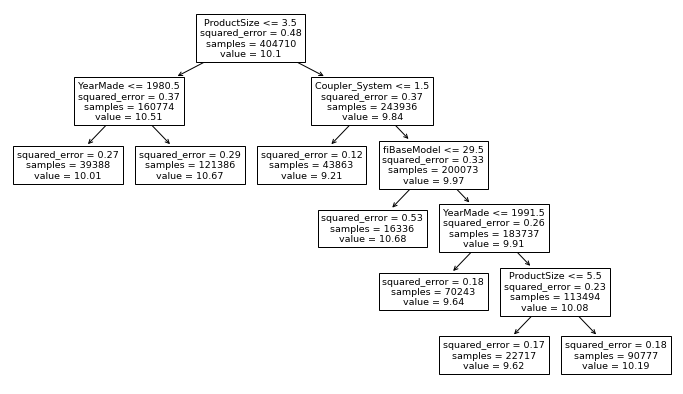

In [14]:
# Create the first DecisionTree
# Categorical does not work to input in Decision Tree
# must convert to its code
model_1 = DecisionTreeRegressor(max_leaf_nodes=7)
model_1.fit(x_train, y_train)
# Visualization of the first desicion tree
feature_names = x_train.columns
fig, ax = plt.subplots(figsize=(12, 7))
plot_tree(model_1, feature_names=feature_names, max_depth=7, precision=2, ax=ax)
x_train.shape

In [15]:
# Check the errors
err_train_model1 = m_rmse(model_1, x_train, y_train)
err_val_model1 = m_rmse(model_1, x_val, y_val)
print("model 1 : Train root mean squared log error ----> {}".format(err_train_model1))
print("model 1 : Validation root mean squared log error ----> {}".format(err_val_model1))

model 1 : Train root mean squered log error ----> 0.481245
model 1 : Validation root mean squered log error ----> 0.498266


### 3.3.- Random Forest models 

In [16]:
# Create the first RandomForest
model_2 = RandomForestRegressor(
    n_estimators=40,
    max_samples=200_000,
    max_features=0.5,
    min_samples_leaf=5,
    oob_score=True,
    n_jobs=-1,
)
model_2.fit(x_train, y_train)
# Check the errors
err_train_model2 = m_rmse(model_2, x_train, y_train)
err_val_model2 = m_rmse(model_2, x_val, y_val)
print("model 2 : Train root mean squared log error ----> {}".format(err_train_model2))
print("model 2 : Validation root mean squared log error ----> {}".format(err_val_model2))

C:\Users\ivan_\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


model 2 : Train root mean squered log error ----> 0.174653
model 2 : Validation root mean squered log error ----> 0.235374


In [17]:
# Check the out-of-bag error (it´s a kind of validation error)
r_mse(model_2.oob_prediction_, y_train)

0.214077

### 3.3.1.- Model interpretation - RandomForest

In [18]:
# Check the importance features
f_importance_model_2 = f_importances_model(model_2, x_train)
f_importance_model_2.head(15)

,cols,imp
13,ProductSize,0.192716
5,YearMade,0.189213
37,Coupler_System,0.071138
51,saleyear,0.057469
14,fiProductClassDesc,0.048380
8,fiModelDesc,0.046732
10,fiSecondaryDesc,0.043720
39,Hydraulics_Flow,0.041911
38,Grouser_Tracks,0.036492
9,fiBaseModel,0.035463


<BarContainer object of 30 artists>

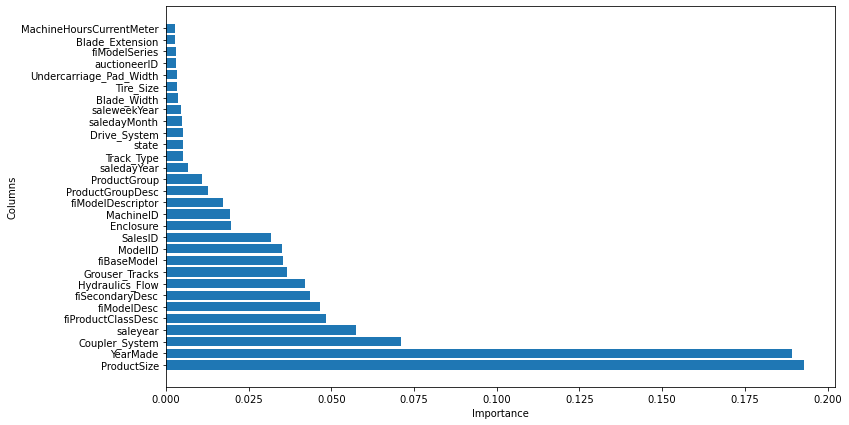

In [19]:
# plot the importance features of model_2
fig, ax = plt.subplots(figsize=(12, 7))
plot_f_importance_model(f_importance_model_2[:30], ax)

In [20]:
# Removing low-importance variables
to_keep = f_importance_model_2[f_importance_model_2.imp > 0.005].cols
x_train_new = x_train[to_keep]
x_val_new = x_val[to_keep]
print("Number of features : {}".format(x_train_new.shape[1]))

Number of features : 21


In [21]:
# Create the second RandomForest
model_3 = RandomForestRegressor(
    n_estimators=40,
    max_samples=200_000,
    max_features=0.5,
    min_samples_leaf=5,
    oob_score=True,
    n_jobs=-1,
)
model_3.fit(x_train_new, y_train)
# Check the errors
err_train_model3 = m_rmse(model_3, x_train_new, y_train)
err_val_model3 = m_rmse(model_3, x_val_new, y_val)
print("model 3 : Train root mean squared log error ----> {}".format(err_train_model3))
print("model 3 : Validation root mean squared log error ----> {}".format(err_val_model3))

C:\Users\ivan_\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


model 3 : Train root mean squered log error ----> 0.180255
model 3 : Validation root mean squered log error ----> 0.234487


<BarContainer object of 21 artists>

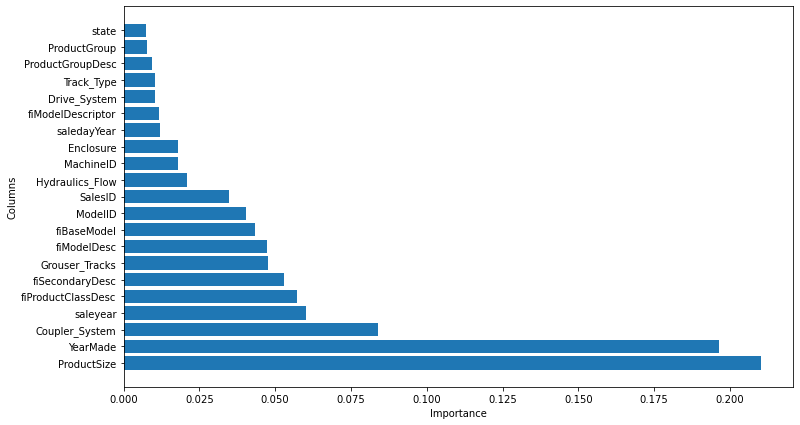

In [22]:
# plot the importance features of model_3
f_importance_model_3 = f_importances_model(model_3, x_train_new)
fig, ax = plt.subplots(figsize=(12, 7))
plot_f_importance_model(f_importance_model_3[:], ax)

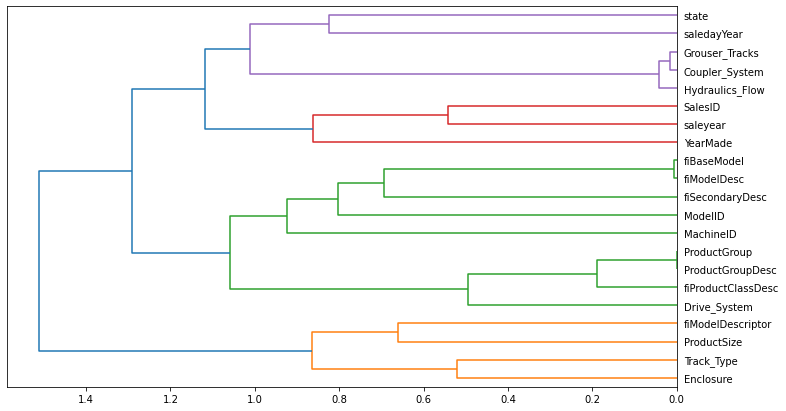

In [23]:
# Removing Redundant Features
# http://datanongrata.com/2019/04/27/67/
x_train_new_t = x_train_new.T
c_dist = pdist(x_train_new_t)  # compute the distance
c_link = linkage(x_train_new_t, metric="correlation", method="complete")  # computing the linkage
fig, ax = plt.subplots(figsize=(12, 7))
B = dendrogram(c_link, labels=list(x_train_new.columns), orientation="left", ax=ax)

In [24]:
# It can see in the dendogram that Grouser_Tracks, Coupler_System, ProductGroup, ProductGroupDesc, fiBaseModel and fiModelDesc
# have a strong correlation.

# get oob score in x_train_new in order to have a reference score
origin = get_oob(x_train_new, y_train)
print("oob score origin: {}".format(origin))

# get oob score erasing Grouser_Tracks, Coupler_System, ProductGroup, ProductGroupDesc, fiBaseModel and fiModelDesc
# one by one
obb_scores = {
    "obb score " + col: get_oob(x_train_new.drop(col, axis=1), y_train)
    for col in (
        "Grouser_Tracks",
        "Coupler_System",
        "ProductGroup",
        "ProductGroupDesc",
        "fiBaseModel",
        "fiModelDesc",
    )
}

print(obb_scores)

C:\Users\ivan_\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


oob score origin: 0.872155618465169


C:\Users\ivan_\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\ivan_\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\ivan_\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\ivan_\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\ivan_\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\ivan_\anaconda3\lib\site-packages\sklearn\base.py:445: U

{'obb score Grouser_Tracks': 0.8730966029112661, 'obb score Coupler_System': 0.8731511717344058, 'obb score ProductGroup': 0.8727214551795199, 'obb score ProductGroupDesc': 0.8731544370494121, 'obb score fiBaseModel': 0.8720945697712124, 'obb score fiModelDesc': 0.87100741905432}


In [57]:
# let's drop Coupler_System, ProductGroupDesc and fiModelDesc because dopping them give a better result
get_oob(x_train_new.drop(["Grouser_Tracks", "fiModelDesc", "ProductGroupDesc"], axis=1), y_train)

C:\Users\ivan_\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


0.8699284664974166

In [25]:
# better results
x_train_final = x_train_new.drop(["Grouser_Tracks", "fiModelDesc", "ProductGroupDesc"], axis=1)
x_val_final = x_val_new.drop(["Grouser_Tracks", "fiModelDesc", "ProductGroupDesc"], axis=1)
x_train_final.shape

(404710, 18)

In [26]:
# Create the third randomForest
model_4 = RandomForestRegressor(
    n_estimators=40,
    max_samples=200_000,
    max_features=0.5,
    min_samples_leaf=5,
    oob_score=True,
    n_jobs=-1,
)
model_4.fit(x_train_final, y_train)
# Check the errors
err_train_model4 = m_rmse(model_4, x_train_final, y_train)
err_val_model4 = m_rmse(model_4, x_val_final, y_val)
print("model 4 : Train root mean squared log error ----> {}".format(err_train_model4))
print("model 4 : Validation root mean squared log error ----> {}".format(err_val_model4))

"""
# save the final DataFrame -- optional
    df_shelve = shelve.open(dataPath+"data_final.db")
    
    try:
        df_shelve["x_train"] = x_train_final
        df_shelve["y_train"] = y_train
        df_shelve["x_val"] = x_val_final
        df_shelve["y_val"] = y_val
    finally:
        df_shelve.close()
"""

C:\Users\ivan_\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


model 4 : Train root mean squered log error ----> 0.180657
model 4 : Validation root mean squered log error ----> 0.235745


'\n# save the final dataFrame -- optional\n    df_shelve = shelve.open(dataPath+"data_final.db")\n    \n    try:\n        df_shelve["x_train"] = x_train_final\n        df_shelve["y_train"] = y_train\n        df_shelve["x_val"] = x_val_final\n        df_shelve["y_val"] = y_val\n    finally:\n        df_shelve.close()\n'

C:\Users\ivan_\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


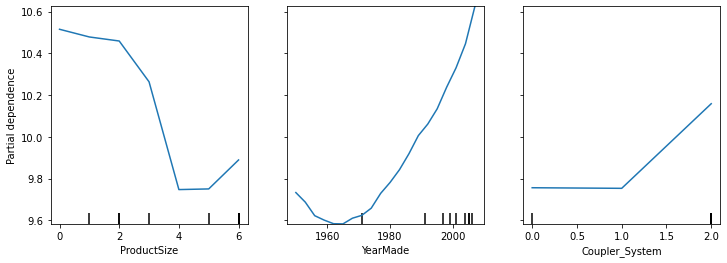

In [27]:
# Analysing Data Lakage
fig, ax = plt.subplots(figsize=(12, 4))
plot_partial_dependence(
    model_4, x_val_final, ["ProductSize", "YearMade", "Coupler_System"], grid_resolution=20, ax=ax
)

In [28]:
# Finding out of the domain
df_dom = pd.concat([x_train_final, x_val_final])
isValid = np.array([0] * len(x_train_final) + [1] * len(x_val_final))

model_5 = RandomForestRegressor(
    n_estimators=40,
    max_samples=210_000,
    max_features=0.5,
    min_samples_leaf=5,
    oob_score=True,
    n_jobs=-1,
)
model_5.fit(df_dom, isValid)
# see feature importance
f_importance_model_5 = f_importances_model(model_5, df_dom)
f_importance_model_5.head(6)

C:\Users\ivan_\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


,cols,imp
14,saledayYear,0.549829
3,saleyear,0.281371
9,SalesID,0.143710
11,MachineID,0.021122
10,Enclosure,0.000987
1,YearMade,0.000968


In [29]:
# Check permormance dropping saleyear, saledayYear, SalesID, MachineID
for col in ("saleyear", "saledayYear", "SalesID", "MachineID"):
    model = RandomForestRegressor(
        n_estimators=40,
        max_samples=210_000,
        max_features=0.5,
        min_samples_leaf=5,
        oob_score=True,
        n_jobs=-1,
    )
    model.fit(x_train_final.drop(col, axis=1), y_train)
    print(col + " {}".format(m_rmse(model, x_val_final.drop(col, axis=1), y_val)))

C:\Users\ivan_\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


saleyear 0.238877


C:\Users\ivan_\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


saledayYear 0.233004


C:\Users\ivan_\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


SalesID 0.236452


C:\Users\ivan_\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


MachineID 0.234361


In [30]:
# lets drop "saledayYear", "SalesID", "MachineID"
x_train_final_time = x_train_final.drop(["saledayYear", "SalesID", "MachineID"], axis=1)
x_val_final_time = x_val_final.drop(["saledayYear", "SalesID", "MachineID"], axis=1)
print(x_train_final_time.shape)

model_6 = RandomForestRegressor(
    n_estimators=40,
    max_samples=200_000,
    max_features=0.5,
    min_samples_leaf=5,
    oob_score=True,
    n_jobs=-1,
)
model_6.fit(x_train_final_time, y_train)
# Check the errors
err_train_model6 = m_rmse(model_6, x_train_final_time, y_train)
err_val_model6 = m_rmse(model_6, x_val_final_time, y_val)
print("model 6 : Train root mean squared log error ----> {}".format(err_train_model6))
print("model 6 : Validation root mean squared log error ----> {}".format(err_val_model6))

(404710, 15)


C:\Users\ivan_\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


model 6 : Train root mean squered log error ----> 0.194706
model 6 : Validation root mean squered log error ----> 0.229725


(array([14444., 11822., 16459., 31660., 30208., 34840., 55596., 53893.,
        83616., 72172.]),
 array([1989. , 1991.3, 1993.6, 1995.9, 1998.2, 2000.5, 2002.8, 2005.1,
        2007.4, 2009.7, 2012. ]),
 <a list of 10 Patch objects>)

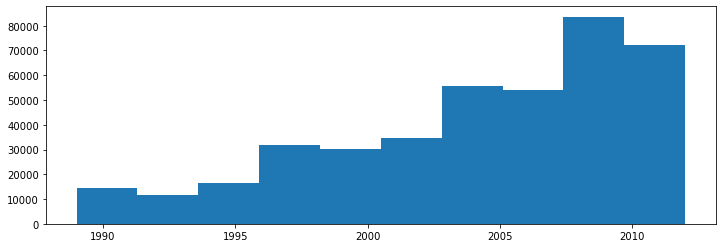

In [31]:
# Check the distribution of the saleyear
fig, ax = plt.subplots(figsize=(12, 4))
ax.hist(x_train_final_time["saleyear"])

In [32]:
# Check if the permormance improve dropping saleyear<2004
cond = x_train_final_time["saleyear"] >= 2004
x_train_final_year = x_train_final_time[cond]
y_train_year = y_train[cond]

model_7 = RandomForestRegressor(
    n_estimators=40,
    max_samples=200_000,
    max_features=0.5,
    min_samples_leaf=5,
    oob_score=True,
    n_jobs=-1,
)
model_7.fit(x_train_final_year, y_train_year)
# Check the errors
err_train_model7 = m_rmse(model_7, x_train_final_year, y_train_year)
err_val_model7 = m_rmse(model_7, x_val_final_time, y_val)
print("model 7 : Train root mean squared log error ----> {}".format(err_train_model7))
print(
    "model 7 : Validation root mean squared log error ----> {}".format(err_val_model7)
)  # Best result

C:\Users\ivan_\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


model 7 : Train root mean squered log error ----> 0.183744
model 7 : Validation root mean squered log error ----> 0.228745


### Summary Results 


| no. model   |  val error  |  no. features  |    
| ----------- | ----------- |  ------------  |
|      1      |  0.498266   |      57        |                
|      2      |  0.235374   |      57        |
|      3      |  0.234487   |      22        |
|      4      |  0.235745   |      19        |
|      6      |  0.229725   |      16        |
|      7      |  0.228745   |      16        |




